In [54]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from glob import glob
import sys


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.10.2  Device :  cuda


In [55]:
turb_location=pd.read_csv("./data/turb_location.csv")
turb_location

,TurbID,x,y
0,1,3349.8515,5939.23193
1,2,3351.0017,6416.64673
2,3,3314.7797,6892.18395
3,4,3352.0940,7366.14203
4,5,3355.3420,7841.20175
...,...,...,...
129,130,12.6509,4814.60040
130,131,23.3458,5284.65439
131,132,62.6774,5749.90633
132,133,78.4309,6231.32903


In [56]:
turb_location

,TurbID,x,y
0,1,3349.8515,5939.23193
1,2,3351.0017,6416.64673
2,3,3314.7797,6892.18395
3,4,3352.0940,7366.14203
4,5,3355.3420,7841.20175
...,...,...,...
129,130,12.6509,4814.60040
130,131,23.3458,5284.65439
131,132,62.6774,5749.90633
132,133,78.4309,6231.32903


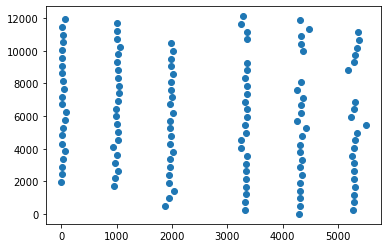

In [57]:
plt.scatter(turb_location.x,turb_location.y,label=turb_location.TurbID)

In [58]:
D=turb_location[turb_location["TurbID"] == idx]['TurbID']
D

133    134
Name: TurbID, dtype: int64

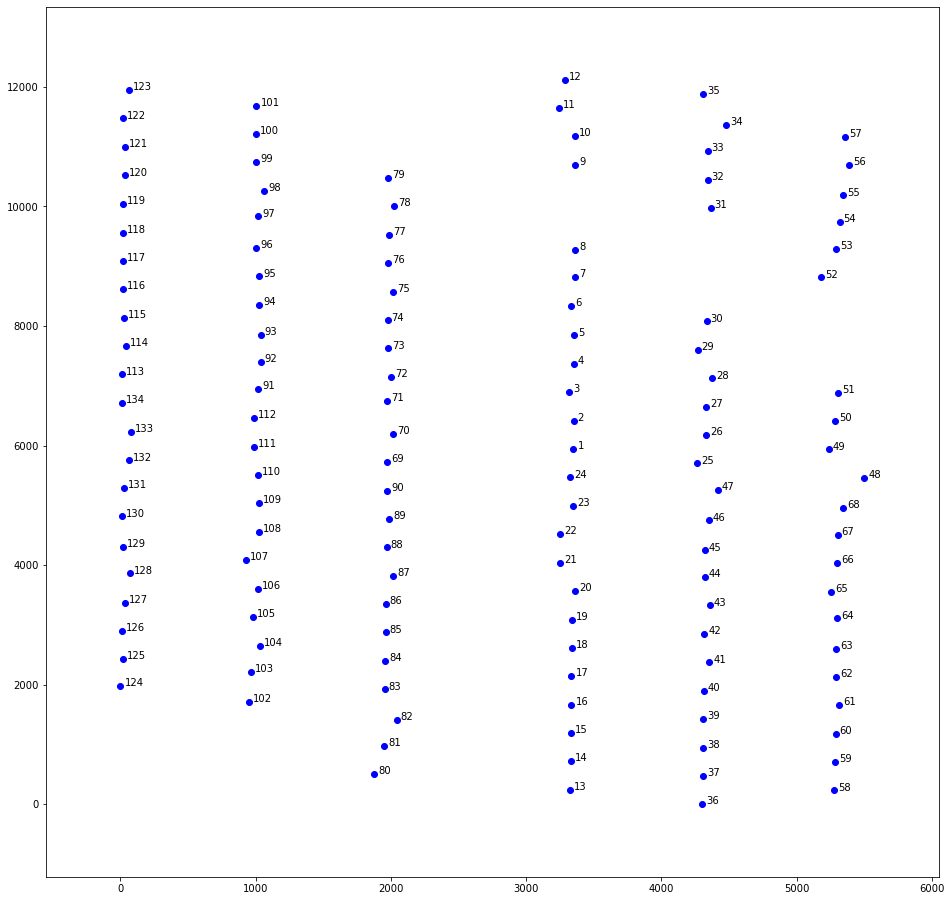

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.margins(0.1, 0.1)

for idx in turb_location.TurbID:
    plt.scatter(turb_location[turb_location["TurbID"] == idx].x, turb_location[turb_location["TurbID"] == idx].y, c='b')
    plt.text(turb_location[turb_location["TurbID"] == idx].x+30, 
             turb_location[turb_location["TurbID"] == idx].y, 
             "{}".format(turb_location[turb_location["TurbID"] == idx]['TurbID'][idx-1]),
             fontsize=10)

    

# 데이터 graph화

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
nor = MinMaxScaler()# 

turb_location[["x","y"]] = nor.fit_transform(turb_location[["x","y"]])

#["TurbID", "Day","Patv","Etmp","Ndir"]

turb_location

,TurbID,x,y
0,1,0.608903,0.489995
1,2,0.609112,0.529382
2,3,0.602528,0.568615
3,4,0.609311,0.607717
4,5,0.609901,0.646910
...,...,...,...
129,130,0.002300,0.397211
130,131,0.004244,0.435991
131,132,0.011393,0.474375
132,133,0.014256,0.514093


In [61]:
dist_lists=[]
for i in range(1,135):
    dist_list = []
    for j in range(1,135):
        x_dist=turb_location.iloc[i-1,1] - turb_location.iloc[j-1,1]
        y_dist=turb_location.iloc[i-1,2] - turb_location.iloc[j-1,2]
        
        #if i == j:
        #    x_dist=1
        #    y_dist=0        
        dist_list.append(np.sqrt(x_dist**2 +y_dist**2))
    dist_lists.append(dist_list)

In [62]:
dist_lists=[pd.DataFrame(dist) for dist in dist_lists]

dist_graph=pd.concat(dist_lists,axis=1)

In [63]:
dist_graph.index=np.arange(1,135)

In [64]:
dist_graph.columns=np.arange(1,135)

In [65]:
dist_graph

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
1,0.000000,0.039388,0.078878,0.117723,0.156918,0.198167,0.237365,0.274405,0.392489,0.431698,...,0.671327,0.657114,0.639322,0.620587,0.620114,0.613658,0.607066,0.597714,0.595135,0.610195
2,0.039388,0.000000,0.039781,0.078335,0.117530,0.158794,0.197977,0.235017,0.353101,0.392310,...,0.689436,0.673323,0.653621,0.632795,0.630032,0.621040,0.612036,0.600245,0.595052,0.607545
3,0.078878,0.039781,0.000000,0.039686,0.078642,0.119542,0.158955,0.195953,0.313973,0.353174,...,0.703396,0.685360,0.663750,0.640852,0.635761,0.624222,0.612808,0.598600,0.590793,0.600648
4,0.117723,0.078335,0.039686,0.000000,0.039198,0.080516,0.119645,0.156683,0.274767,0.313975,...,0.730266,0.710782,0.687711,0.663191,0.656169,0.642476,0.628964,0.612606,0.602374,0.609632
5,0.156918,0.117530,0.078642,0.039198,0.000000,0.041486,0.080447,0.117487,0.235571,0.274779,...,0.753321,0.732363,0.707831,0.681707,0.672741,0.656909,0.641333,0.622881,0.610273,0.614919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.613658,0.621040,0.624222,0.642476,0.656909,0.669410,0.692332,0.710702,0.778256,0.803470,...,0.197123,0.158061,0.119050,0.079240,0.041727,0.000000,0.038829,0.077698,0.117492,0.156659
131,0.607066,0.612036,0.612808,0.628964,0.641333,0.651698,0.672948,0.689754,0.753118,0.777191,...,0.235902,0.196858,0.157788,0.117654,0.080491,0.038829,0.000000,0.039044,0.078741,0.117899
132,0.597714,0.600245,0.598600,0.612606,0.622881,0.631099,0.650648,0.665884,0.725095,0.748057,...,0.274401,0.235429,0.196249,0.155756,0.119131,0.077698,0.039044,0.000000,0.039821,0.080041
133,0.595135,0.595052,0.590793,0.602374,0.610273,0.616029,0.633561,0.646929,0.701069,0.722640,...,0.314190,0.275235,0.236040,0.195478,0.158951,0.117492,0.078741,0.039821,0.000000,0.041604


In [66]:
nor2 = MinMaxScaler((1,2))# 

dist_graph = nor2.fit_transform(dist_graph)
dist_graph

array([[1.        , 1.05237606, 1.10859536, ..., 1.56303717, 1.55769055,
        1.55634318],
       [1.05073294, 1.        , 1.05476876, ..., 1.56542106, 1.55761316,
        1.55392735],
       [1.10159728, 1.0528989 , 1.        , ..., 1.56387142, 1.55362177,
        1.54763922],
       ...,
       [1.76987505, 1.79817481, 1.82412375, ..., 1.        , 1.03731571,
        1.072977  ],
       [1.76655252, 1.79126965, 1.81337526, ..., 1.03751087, 1.        ,
        1.03793275],
       [1.78594996, 1.80788174, 1.8269435 , ..., 1.07539716, 1.03898682,
        1.        ]])

In [69]:
dist_graph=1/pd.DataFrame(dist_graph)

In [71]:
dist_graph

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,1.000000,0.950231,0.902042,0.865009,0.832260,0.801721,0.777960,0.757507,0.706275,0.692923,...,0.643058,0.643879,0.645212,0.646521,0.644373,0.642797,0.641163,0.639780,0.641976,0.642532
1,0.951717,1.000000,0.948075,0.905925,0.868842,0.834601,0.807720,0.784824,0.727726,0.712897,...,0.636925,0.638272,0.640132,0.642057,0.640729,0.640047,0.639285,0.638806,0.642008,0.643531
2,0.907773,0.949759,1.000000,0.950020,0.908259,0.870178,0.839538,0.813935,0.750366,0.733917,...,0.632277,0.634171,0.636582,0.639143,0.638642,0.638869,0.638995,0.639439,0.643657,0.646145
3,0.868334,0.905661,0.948193,1.000000,0.952068,0.908690,0.874230,0.845461,0.774509,0.756251,...,0.623518,0.625681,0.628339,0.631204,0.631319,0.632193,0.632970,0.634089,0.639192,0.642743
4,0.831867,0.864838,0.902307,0.950605,1.000000,0.950774,0.911800,0.879461,0.800250,0.779985,...,0.616194,0.618650,0.621580,0.624771,0.625495,0.627012,0.628434,0.630222,0.636182,0.640758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.558531,0.547697,0.537808,0.540047,0.542376,0.544830,0.545710,0.546715,0.548055,0.548003,...,0.859855,0.882582,0.907117,0.934744,0.964193,1.000000,0.965440,0.931801,0.900820,0.875018
130,0.561192,0.551312,0.542392,0.545322,0.548326,0.551472,0.552741,0.554119,0.556174,0.556226,...,0.836785,0.857858,0.880504,0.906081,0.933152,0.966033,1.000000,0.964526,0.931283,0.902939
131,0.565012,0.556119,0.548208,0.551848,0.555545,0.559402,0.561056,0.562803,0.565513,0.565636,...,0.815075,0.834614,0.855584,0.879336,0.904138,0.934265,0.965255,1.000000,0.964027,0.931986
132,0.566074,0.558263,0.551458,0.556010,0.560588,0.565351,0.567599,0.569896,0.573774,0.574109,...,0.793789,0.811911,0.831244,0.853084,0.876067,0.903836,0.932320,0.963845,1.000000,0.963454


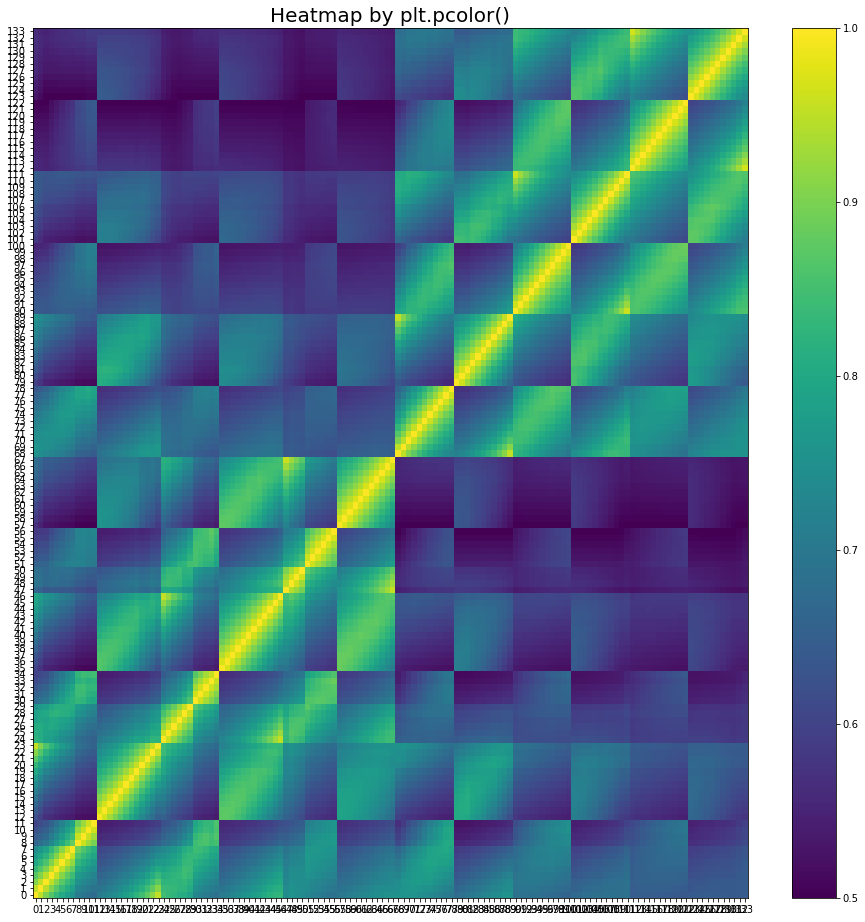

In [72]:
plt.figure(figsize=(16, 16))
plt.margins(0.1, 0.1)


# heatmap by plt.pcolor()
plt.pcolor(dist_graph)
plt.xticks(np.arange(0.5, len(dist_graph.columns), 1), dist_graph.columns)
plt.yticks(np.arange(0.5, len(dist_graph.index), 1), dist_graph.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.colorbar()
plt.show()


In [81]:
dist_graph

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
1,0.000000,477.416186,953.597181,1426.911862,1901.977745,2401.652598,2877.026292,3325.998899,4757.324261,5232.559670,...,4841.928403,4517.613947,4195.585425,3883.577957,3707.901199,3521.605305,3390.296732,3292.621713,3284.435029,3427.113386
2,477.416186,0.000000,476.914752,949.495928,1424.561632,1924.271895,2399.610596,2848.582863,4279.908097,4755.143499,...,5199.524860,4852.584495,4504.397149,4159.449658,3942.164420,3702.855453,3514.925383,3355.237616,3277.813645,3352.827385
3,953.597181,476.914752,0.000000,475.424672,949.884248,1448.687804,1924.598651,2373.467008,3804.629594,4279.847629,...,5551.320685,5184.462345,4813.736396,4440.753946,4187.032351,3901.334133,3663.016299,3446.877940,3303.132268,3308.272081
4,1426.911862,949.495928,475.424672,0.000000,475.070823,974.919168,1450.120949,1899.090116,3330.412707,3805.648172,...,5960.150703,5580.039901,5194.208358,4802.178512,4522.364286,4202.647369,3925.959166,3665.034707,3464.775698,3403.914569
5,1901.977745,1424.561632,949.884248,475.070823,0.000000,500.267546,975.050484,1424.021298,2855.347445,3330.582671,...,6361.220419,5968.986447,5569.722174,5161.129842,4858.365747,4509.312533,4199.777742,3900.661060,3651.004866,3529.043667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,3521.605305,3702.855453,3901.334133,4202.647369,4509.312533,4840.979272,5217.424317,5569.085589,6767.690528,7185.187221,...,2389.300373,1915.839931,1442.539230,954.199660,505.592748,0.000000,470.175642,936.642853,1418.254920,1898.865224
131,3390.296732,3514.925383,3663.016299,3925.959166,4199.777742,4502.243222,4858.909245,5194.238746,6357.785685,6767.563812,...,2859.350503,2385.935470,1912.489740,1423.334921,975.607429,470.175642,0.000000,466.911493,948.275931,1428.861232
132,3292.621713,3355.237616,3446.877940,3665.034707,3900.661060,4169.458015,4503.147552,4819.927438,5944.845848,6346.444887,...,3324.889584,2851.655468,2377.933216,1887.880132,1441.497847,936.642853,466.911493,0.000000,481.680380,964.925552
133,3284.435029,3277.813645,3303.132268,3464.775698,3651.004866,3875.415174,4177.803754,4469.353432,5541.342119,5931.696628,...,3806.490120,3333.297044,2859.537522,2369.314847,1923.176839,1418.254920,948.275931,481.680380,0.000000,486.781930


In [55]:
turb_location[turb_location["TurbID"] == 1 ]['x']-turb_location[turb_location["TurbID"] == 2 ]['x']

0   NaN
1   NaN
Name: x, dtype: float64

In [61]:
turb_location.iloc[0,1] - turb_location.iloc[0,1]

0.0

In [73]:
dist_graph.to_csv("./data/distance_graph.csv",index=False)

# feature graph

In [138]:
dist_graph

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,1.000000,0.950231,0.902042,0.865009,0.832260,0.801721,0.777960,0.757507,0.706275,0.692923,...,0.643058,0.643879,0.645212,0.646521,0.644373,0.642797,0.641163,0.639780,0.641976,0.642532
1,0.951717,1.000000,0.948075,0.905925,0.868842,0.834601,0.807720,0.784824,0.727726,0.712897,...,0.636925,0.638272,0.640132,0.642057,0.640729,0.640047,0.639285,0.638806,0.642008,0.643531
2,0.907773,0.949759,1.000000,0.950020,0.908259,0.870178,0.839538,0.813935,0.750366,0.733917,...,0.632277,0.634171,0.636582,0.639143,0.638642,0.638869,0.638995,0.639439,0.643657,0.646145
3,0.868334,0.905661,0.948193,1.000000,0.952068,0.908690,0.874230,0.845461,0.774509,0.756251,...,0.623518,0.625681,0.628339,0.631204,0.631319,0.632193,0.632970,0.634089,0.639192,0.642743
4,0.831867,0.864838,0.902307,0.950605,1.000000,0.950774,0.911800,0.879461,0.800250,0.779985,...,0.616194,0.618650,0.621580,0.624771,0.625495,0.627012,0.628434,0.630222,0.636182,0.640758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.558531,0.547697,0.537808,0.540047,0.542376,0.544830,0.545710,0.546715,0.548055,0.548003,...,0.859855,0.882582,0.907117,0.934744,0.964193,1.000000,0.965440,0.931801,0.900820,0.875018
130,0.561192,0.551312,0.542392,0.545322,0.548326,0.551472,0.552741,0.554119,0.556174,0.556226,...,0.836785,0.857858,0.880504,0.906081,0.933152,0.966033,1.000000,0.964526,0.931283,0.902939
131,0.565012,0.556119,0.548208,0.551848,0.555545,0.559402,0.561056,0.562803,0.565513,0.565636,...,0.815075,0.834614,0.855584,0.879336,0.904138,0.934265,0.965255,1.000000,0.964027,0.931986
132,0.566074,0.558263,0.551458,0.556010,0.560588,0.565351,0.567599,0.569896,0.573774,0.574109,...,0.793789,0.811911,0.831244,0.853084,0.876067,0.903836,0.932320,0.963845,1.000000,0.963454


In [139]:
train_data=pd.read_csv("./data/train_data.csv")
train_data

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859195,134,200,23:10,4.86,4.68,9.04,10.40,174.39,0.01,0.01,0.01,-108.13,308.65
3859196,134,200,23:20,4.46,-4.00,8.79,10.33,179.76,0.01,0.01,0.01,-93.64,221.60
3859197,134,200,23:30,4.23,-0.08,8.74,10.22,172.35,0.01,0.01,0.01,-111.20,220.60
3859198,134,200,23:40,4.36,-6.12,8.64,10.10,172.35,0.01,0.01,0.01,-108.04,222.15


In [140]:
train_data = train_data.fillna(method = 'ffill').fillna(method = 'bfill')

print(train_data.isnull().sum())

TurbID     0
Day        0
Tmstamp    0
Wspd       0
Wdir       0
Etmp       0
Itmp       0
Ndir       0
Pab1       0
Pab2       0
Pab3       0
Prtv       0
Patv       0
dtype: int64


In [141]:
train_data

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859195,134,200,23:10,4.86,4.68,9.04,10.40,174.39,0.01,0.01,0.01,-108.13,308.65
3859196,134,200,23:20,4.46,-4.00,8.79,10.33,179.76,0.01,0.01,0.01,-93.64,221.60
3859197,134,200,23:30,4.23,-0.08,8.74,10.22,172.35,0.01,0.01,0.01,-111.20,220.60
3859198,134,200,23:40,4.36,-6.12,8.64,10.10,172.35,0.01,0.01,0.01,-108.04,222.15


In [142]:
train_data['Wspd_y']=train_data['Wspd']

In [143]:
turbins = []

for turb in range(1,135):
    turbins.append(train_data[train_data['TurbID']==turb].copy())


In [144]:
wspd_turbins=[]

for turb in turbins:
    wspd_turbins.append(turb['Wspd'].reset_index(drop=True))

In [145]:
wspd_turbins

[0        6.17
 1        6.17
 2        6.27
 3        6.42
 4        6.25
          ... 
 28795    4.70
 28796    3.53
 28797    3.50
 28798    4.26
 28799    3.97
 Name: Wspd, Length: 28800, dtype: float64,
 0        3.97
 1        6.85
 2        7.02
 3        7.26
 4        7.00
          ... 
 28795    5.47
 28796    4.54
 28797    3.79
 28798    4.06
 28799    3.76
 Name: Wspd, Length: 28800, dtype: float64,
 0        3.76
 1        6.36
 2        6.29
 3        6.27
 4        6.21
          ... 
 28795    4.10
 28796    3.99
 28797    3.28
 28798    3.57
 28799    4.02
 Name: Wspd, Length: 28800, dtype: float64,
 0        4.02
 1        5.65
 2        5.78
 3        6.04
 4        5.78
          ... 
 28795    5.52
 28796    4.82
 28797    3.94
 28798    3.78
 28799    3.30
 Name: Wspd, Length: 28800, dtype: float64,
 0        3.30
 1        6.01
 2        6.20
 3        6.27
 4        6.10
          ... 
 28795    5.79
 28796    5.71
 28797    3.88
 28798    3.30
 28799    3.50

In [146]:
wspd_matrix=pd.concat(wspd_turbins,axis=1)
wspd_matrix

,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,...,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd,Wspd
0,6.17,3.97,3.76,4.02,3.30,3.50,4.26,5.55,4.67,4.10,...,4.88,3.92,3.91,3.87,3.84,3.39,3.88,4.23,4.96,3.69
1,6.17,6.85,6.36,5.65,6.01,6.72,7.19,7.03,6.16,6.43,...,5.09,5.07,4.68,4.78,5.51,5.48,4.38,6.17,4.40,4.85
2,6.27,7.02,6.29,5.78,6.20,6.42,7.26,7.09,6.10,6.50,...,4.68,4.92,4.55,4.52,5.12,5.01,4.33,5.74,4.14,4.33
3,6.42,7.26,6.27,6.04,6.27,6.57,7.45,7.32,6.26,6.64,...,4.72,4.85,4.44,4.48,5.23,4.62,4.31,5.61,4.29,4.25
4,6.25,7.00,6.21,5.78,6.10,6.28,7.01,7.05,5.96,6.13,...,4.37,4.50,4.18,4.34,4.92,4.60,4.33,5.26,3.75,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,4.70,5.47,4.10,5.52,5.79,5.59,6.97,6.36,6.13,5.65,...,4.44,4.66,4.56,4.83,4.46,5.16,4.60,6.46,4.74,4.86
28796,3.53,4.54,3.99,4.82,5.71,5.92,7.09,6.19,5.78,5.75,...,4.16,4.27,4.67,4.50,4.42,4.47,4.78,5.56,4.00,4.46
28797,3.50,3.79,3.28,3.94,3.88,4.50,6.07,5.72,5.23,5.38,...,3.50,3.58,3.64,4.12,4.24,4.92,4.28,5.35,3.97,4.23
28798,4.26,4.06,3.57,3.78,3.30,3.49,3.92,5.40,4.89,5.52,...,3.32,3.52,4.04,4.03,3.96,4.44,3.91,4.88,3.67,4.36


In [147]:
wspd_matrix.columns=np.arange(1,135)
wspd_matrix

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
0,6.17,3.97,3.76,4.02,3.30,3.50,4.26,5.55,4.67,4.10,...,4.88,3.92,3.91,3.87,3.84,3.39,3.88,4.23,4.96,3.69
1,6.17,6.85,6.36,5.65,6.01,6.72,7.19,7.03,6.16,6.43,...,5.09,5.07,4.68,4.78,5.51,5.48,4.38,6.17,4.40,4.85
2,6.27,7.02,6.29,5.78,6.20,6.42,7.26,7.09,6.10,6.50,...,4.68,4.92,4.55,4.52,5.12,5.01,4.33,5.74,4.14,4.33
3,6.42,7.26,6.27,6.04,6.27,6.57,7.45,7.32,6.26,6.64,...,4.72,4.85,4.44,4.48,5.23,4.62,4.31,5.61,4.29,4.25
4,6.25,7.00,6.21,5.78,6.10,6.28,7.01,7.05,5.96,6.13,...,4.37,4.50,4.18,4.34,4.92,4.60,4.33,5.26,3.75,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,4.70,5.47,4.10,5.52,5.79,5.59,6.97,6.36,6.13,5.65,...,4.44,4.66,4.56,4.83,4.46,5.16,4.60,6.46,4.74,4.86
28796,3.53,4.54,3.99,4.82,5.71,5.92,7.09,6.19,5.78,5.75,...,4.16,4.27,4.67,4.50,4.42,4.47,4.78,5.56,4.00,4.46
28797,3.50,3.79,3.28,3.94,3.88,4.50,6.07,5.72,5.23,5.38,...,3.50,3.58,3.64,4.12,4.24,4.92,4.28,5.35,3.97,4.23
28798,4.26,4.06,3.57,3.78,3.30,3.49,3.92,5.40,4.89,5.52,...,3.32,3.52,4.04,4.03,3.96,4.44,3.91,4.88,3.67,4.36


In [148]:
dist_graph

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,1.000000,0.950231,0.902042,0.865009,0.832260,0.801721,0.777960,0.757507,0.706275,0.692923,...,0.643058,0.643879,0.645212,0.646521,0.644373,0.642797,0.641163,0.639780,0.641976,0.642532
1,0.951717,1.000000,0.948075,0.905925,0.868842,0.834601,0.807720,0.784824,0.727726,0.712897,...,0.636925,0.638272,0.640132,0.642057,0.640729,0.640047,0.639285,0.638806,0.642008,0.643531
2,0.907773,0.949759,1.000000,0.950020,0.908259,0.870178,0.839538,0.813935,0.750366,0.733917,...,0.632277,0.634171,0.636582,0.639143,0.638642,0.638869,0.638995,0.639439,0.643657,0.646145
3,0.868334,0.905661,0.948193,1.000000,0.952068,0.908690,0.874230,0.845461,0.774509,0.756251,...,0.623518,0.625681,0.628339,0.631204,0.631319,0.632193,0.632970,0.634089,0.639192,0.642743
4,0.831867,0.864838,0.902307,0.950605,1.000000,0.950774,0.911800,0.879461,0.800250,0.779985,...,0.616194,0.618650,0.621580,0.624771,0.625495,0.627012,0.628434,0.630222,0.636182,0.640758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.558531,0.547697,0.537808,0.540047,0.542376,0.544830,0.545710,0.546715,0.548055,0.548003,...,0.859855,0.882582,0.907117,0.934744,0.964193,1.000000,0.965440,0.931801,0.900820,0.875018
130,0.561192,0.551312,0.542392,0.545322,0.548326,0.551472,0.552741,0.554119,0.556174,0.556226,...,0.836785,0.857858,0.880504,0.906081,0.933152,0.966033,1.000000,0.964526,0.931283,0.902939
131,0.565012,0.556119,0.548208,0.551848,0.555545,0.559402,0.561056,0.562803,0.565513,0.565636,...,0.815075,0.834614,0.855584,0.879336,0.904138,0.934265,0.965255,1.000000,0.964027,0.931986
132,0.566074,0.558263,0.551458,0.556010,0.560588,0.565351,0.567599,0.569896,0.573774,0.574109,...,0.793789,0.811911,0.831244,0.853084,0.876067,0.903836,0.932320,0.963845,1.000000,0.963454


In [149]:
weighted_wspd_matrix=np.dot(wspd_matrix,dist_graph)

In [150]:
weighted_wspd_matrix=pd.DataFrame(weighted_wspd_matrix)
weighted_wspd_matrix.columns=np.arange(1,135)
weighted_wspd_matrix

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
0,382.562878,377.872377,372.375531,374.958856,376.358963,376.933961,377.776892,377.655239,374.873964,373.265390,...,384.062790,385.366504,386.637194,387.701328,387.479907,387.317993,387.000655,386.589738,388.260942,389.700901
1,505.773109,500.042423,493.028940,496.355688,498.045569,498.439228,499.084725,498.356035,493.278746,490.797550,...,502.164936,503.923048,505.646333,507.111598,506.743870,506.416024,505.783197,505.060264,506.909619,508.466088
2,493.889885,488.443509,481.711044,485.055823,486.770515,487.184295,487.867660,487.179865,482.239135,479.814395,...,488.738128,490.447936,492.125314,493.556994,493.232300,492.968881,492.432263,491.806485,493.728259,495.373024
3,505.322684,499.879504,493.105105,496.635965,498.475257,498.984313,499.747889,499.092715,494.098575,491.614386,...,499.283575,501.035018,502.764046,504.259298,503.973090,503.753797,503.287892,502.740983,504.827664,506.616551
4,481.282030,476.053062,469.556083,472.827372,474.500001,474.903293,475.552501,474.875101,469.981199,467.589061,...,474.968320,476.680512,478.383215,479.875748,479.668719,479.538105,479.153368,478.674600,480.698663,482.447426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,487.600220,482.413523,476.097414,479.857924,481.984110,482.834971,483.794064,483.383418,479.139187,476.848355,...,487.092781,489.108859,491.119646,492.929427,493.015745,493.262882,493.210175,493.065163,495.388041,497.345222
28796,450.177616,445.567077,439.972801,443.703862,445.932414,446.936168,447.959664,447.638990,443.790635,441.678421,...,450.128760,452.005843,453.880849,455.537702,455.600939,455.786984,455.719426,455.527174,457.648874,459.468856
28797,403.090619,398.777540,393.629565,396.938282,398.962641,400.032341,401.181508,401.127793,398.272526,396.535059,...,403.294062,405.054905,406.834653,408.480281,408.756336,409.150709,409.256760,409.262855,411.358842,413.202100
28798,391.937554,387.590263,382.379454,385.403173,387.188812,388.091817,389.187138,389.275312,386.904697,385.334826,...,391.805654,393.457540,395.126206,396.631881,396.843342,397.170435,397.248948,397.248088,399.331595,401.221956


In [151]:
weighted_wspd_matrix

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
0,382.562878,377.872377,372.375531,374.958856,376.358963,376.933961,377.776892,377.655239,374.873964,373.265390,...,384.062790,385.366504,386.637194,387.701328,387.479907,387.317993,387.000655,386.589738,388.260942,389.700901
1,505.773109,500.042423,493.028940,496.355688,498.045569,498.439228,499.084725,498.356035,493.278746,490.797550,...,502.164936,503.923048,505.646333,507.111598,506.743870,506.416024,505.783197,505.060264,506.909619,508.466088
2,493.889885,488.443509,481.711044,485.055823,486.770515,487.184295,487.867660,487.179865,482.239135,479.814395,...,488.738128,490.447936,492.125314,493.556994,493.232300,492.968881,492.432263,491.806485,493.728259,495.373024
3,505.322684,499.879504,493.105105,496.635965,498.475257,498.984313,499.747889,499.092715,494.098575,491.614386,...,499.283575,501.035018,502.764046,504.259298,503.973090,503.753797,503.287892,502.740983,504.827664,506.616551
4,481.282030,476.053062,469.556083,472.827372,474.500001,474.903293,475.552501,474.875101,469.981199,467.589061,...,474.968320,476.680512,478.383215,479.875748,479.668719,479.538105,479.153368,478.674600,480.698663,482.447426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,487.600220,482.413523,476.097414,479.857924,481.984110,482.834971,483.794064,483.383418,479.139187,476.848355,...,487.092781,489.108859,491.119646,492.929427,493.015745,493.262882,493.210175,493.065163,495.388041,497.345222
28796,450.177616,445.567077,439.972801,443.703862,445.932414,446.936168,447.959664,447.638990,443.790635,441.678421,...,450.128760,452.005843,453.880849,455.537702,455.600939,455.786984,455.719426,455.527174,457.648874,459.468856
28797,403.090619,398.777540,393.629565,396.938282,398.962641,400.032341,401.181508,401.127793,398.272526,396.535059,...,403.294062,405.054905,406.834653,408.480281,408.756336,409.150709,409.256760,409.262855,411.358842,413.202100
28798,391.937554,387.590263,382.379454,385.403173,387.188812,388.091817,389.187138,389.275312,386.904697,385.334826,...,391.805654,393.457540,395.126206,396.631881,396.843342,397.170435,397.248948,397.248088,399.331595,401.221956


In [152]:
weighted_wspd_matrix.to_csv("./data/weighted_wspd_matrix.csv",index=False)

In [168]:
# wspd 데이터 수정.

for turb in range(1,135):
    train_data.loc[train_data['TurbID']==turb,'Wspd'] = weighted_wspd_matrix.iloc[:,turb-1].tolist()
    
    

In [171]:
train_data.to_csv("./data/weighted_wspd_train.csv",index=False)